In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
#coordinates and connectivity

Cord=np.array([[0,0],[0,3],[4,3],[4,0]])
Conec=np.array([[1,2],[2,3],[4,3]])-1
theta=np.array([90,0,90],dtype=int)
theta=np.deg2rad(theta,dtype=float,)
membs=(Conec.shape[0])
ndof=3*(Cord.shape[0])

In [56]:
#store the sin and cos of each member as C and S

lamxy=np.zeros(Conec.shape)
for i in range(len(Conec)):
    C=np.cos(theta[i])
    S=np.sin(theta[i])
    lamxy[i]=np.array([C,S])


In [57]:
#section information

E=210e6
A=2e-2
I=5e-5


In [58]:
#function calucates length of each member
def Lmember(Cordinates, Conec,member=1):
    m=member
    Cord=Cordinates
    Conec=Conec
    x1,y1= Cord[Conec[m,0]][0], Cord[Conec[m,0]][1]
    x2,y2= Cord[Conec[m,1]][0], Cord[Conec[m,1]][1]
    L=np.power( (np.power((x1-x2),2) + np.power((y1-y2),2)),0.5)
    return L


In [59]:
#length of all the members stored in Lenths array
Lenths=np.zeros((membs,))
for i in range(membs):
    Lenths[i]=Lmember(Cord,Conec,member=i)
    

In [60]:
#element stiffness matrix
km=np.zeros((membs,6,6))
for i in range(membs):
    L=Lenths[i]
    C=lamxy[i][0]
    S=lamxy[i][1]
    
    P=((12*I)/L**2) 
    Q= (6*I)/L

    km[i]= (E/L)*np.array([ [A*C**2 + P*S**2 , (A-P)*C*S, -Q*S, -(A*C**2 + P*S**2), -(A-P)*C*S, -Q*S],
                  [(A-P)*C*S,  A*S**2 + P*C**2, Q*C, -(A-P)*C*S, -(A*S**2 + P*C**2) ,Q*C],
                 [-Q*S,Q*C,4*I, Q*S,-Q*C,2*I],
                 [ -(A*C**2 + P*S**2), -(A-P)*C*S, Q*S, (A*C**2 + P*S**2), (A-P)*C*S, Q*S],
                 [-(A-P)*C*S, -(A*S**2 + P*C**2) , -Q*C, -(A-P)*C*S,A*S**2+P*C**2, -P*C ],
                 [-Q*S,Q*C,2*I,Q*S,-Q*C,4*I]])



In [61]:
#connectivity information of each member

dofs=np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])-1
Cord=np.array([[0,0],[0,3],[4,3],[4,0]])
Conec=np.array([[1,2],[2,3],[4,3]])-1
dof_label=np.zeros((membs,6),dtype=int)
for i in range(membs):
    p,q=Conec[i]
    dof_label[i]=np.concatenate((dofs[p],dofs[q]),)   
print(dof_label)  

[[ 0  1  2  3  4  5]
 [ 3  4  5  6  7  8]
 [ 9 10 11  6  7  8]]


In [75]:
#global matrix

# np.set_printoptions(precision=4)
np.set_printoptions(suppress=True,precision=3)
KK=np.zeros((ndof,ndof))
for p in range(km.shape[0]):
    for q in range(km.shape[1]):
        for r in range(km.shape[2]):
            KK[dof_label[p][r],dof_label[p][q]]+=km[p][q][r]
print(KK/100000)

[[  0.047   0.     -0.07   -0.047  -0.     -0.07    0.      0.      0.
    0.      0.      0.   ]
 [  0.     14.      0.     -0.    -14.      0.      0.      0.      0.
    0.      0.      0.   ]
 [ -0.07    0.      0.14    0.07   -0.      0.07    0.      0.      0.
    0.      0.      0.   ]
 [ -0.047  -0.      0.07   10.547  -0.      0.07  -10.5     0.      0.
    0.      0.      0.   ]
 [ -0.    -14.     -0.      0.     14.02    0.039   0.     -0.02    0.039
    0.      0.      0.   ]
 [ -0.07    0.      0.07    0.07    0.039   0.245   0.     -0.039   0.052
    0.      0.      0.   ]
 [  0.      0.      0.    -10.5     0.      0.     10.547  -0.      0.07
   -0.047  -0.      0.07 ]
 [  0.      0.      0.      0.     -0.02   -0.039   0.     14.02   -0.039
   -0.    -14.     -0.   ]
 [  0.      0.      0.      0.      0.039   0.052   0.07   -0.02    0.245
   -0.07    0.      0.07 ]
 [  0.      0.      0.      0.      0.      0.     -0.047  -0.     -0.07
    0.047   0.     -0.07 ]
 [  

In [76]:
#post processing


dof_seq=np.array([4,5,6,7,8,9,1,2,3,10,11,12])-1  #[knows unknowns]----
free_dofs=6
xx=free_dofs
uk=dof_seq[-xx:]
uu=dof_seq[:xx]

In [84]:
F=np.zeros((ndof,))
UU=np.zeros((ndof,))
U=np.zeros((ndof,))

In [85]:
F[3]=-20 #kn
F[8]=12 #kN-m
F=F[dof_seq]
fk=F[:xx]

In [86]:
#Kpp=KG[np.ix_(dof_seq[:xx],dof_seq[:xx])]
k11=KK[np.ix_(uu,uu)]


In [87]:
print(f' 10e6 \n* {k11/1000000}')

 10e6 
* [[ 1.0547 -0.      0.007  -1.05    0.      0.    ]
 [ 0.      1.402   0.0039  0.     -0.002   0.0039]
 [ 0.007   0.0039  0.0245  0.     -0.0039  0.0053]
 [-1.05    0.      0.      1.0547 -0.      0.007 ]
 [ 0.     -0.002  -0.0039  0.      1.402  -0.0039]
 [ 0.      0.0039  0.0053  0.007  -0.002   0.0245]]


In [88]:
k11=np.linalg.inv(k11)
# k11=np.round(k11,6)

#unknown dof dispalcement
UK=np.matmul(k11,fk)

In [89]:
np.set_printoptions(precision=4)
print(UK)

[-0.0038 -0.      0.0008 -0.0038  0.      0.0014]


In [91]:
#supplying unknown displacemnts into main nodal displacement vecotr
UU[:xx]=UK

#resequencing the nodal displacement vector as indexed from 0 - dofs
U[dof_seq]=UU
# for i in range(len(dof_seq)):
#     U[dof_seq[i]]=UU[i]
#     P[dof_seq[i]]=FF[i]

In [92]:
# for i in range(len(dof_seq)):
#     U[dof_seq[i]]=UU[i]
#     P[dof_seq[i]]=FF[i]

In [107]:
#Global force vector
F=np.matmul(KK,U)
print("Global forces vector")
print(np.vstack(F))

Global forces vector
[[ 12.1875]
 [  8.5841]
 [-21.0221]
 [-20.    ]
 [  0.    ]
 [  0.    ]
 [ -0.    ]
 [ -0.    ]
 [ 12.    ]
 [  7.8125]
 [ -8.5841]
 [-16.6297]]


In [94]:
#eleU stores element displacements of each dof 
eleU=np.zeros((membs,6))

In [95]:
for i in range(membs):
    p,q=Conec[i]
    eleU[i]=np.concatenate((U[dofs[p]],U[dofs[q]]))

In [96]:
#eaach vector has the nodal displacements of a particular memeber
print(eleU.T)

[[ 0.     -0.0038  0.    ]
 [ 0.     -0.      0.    ]
 [ 0.      0.0008  0.    ]
 [-0.0038 -0.0038 -0.0038]
 [-0.      0.      0.    ]
 [ 0.0008  0.0014  0.0014]]


In [97]:
#member force function
def memforce(lamxy,Lenths,eleU,member=1):
    i=member
    L=Lenths[i]
    C=lamxy[i][0]
    S=lamxy[i][1]
    w1 = E*A/L;
    w2 = 12*E*I/(L*L*L);
    w3 = 6*E*I/(L*L);
    w4 = 4*E*I/L;
    w5 = 2*E*I/L;
    u=eleU[i].T
    kprime = np.array([[w1, 0, 0, -w1, 0, 0],
                       [0, w2, w3, 0, -w2, w3],
                        [0, w3, w4, 0, -w3, w5],
                        [-w1, 0, 0, w1, 0, 0,],
                        [0, -w2, -w3, 0, w2, -w3],
                       [0, w3, w5, 0, -w3, w4]]);
    T = np.array([[C, S, 0, 0, 0, 0],
                  [-S, C, 0, 0, 0, 0],
                  [0, 0, 1, 0, 0, 0],
                  [0, 0, 0, C, S, 0],
                  [0, 0, 0, -S, C, 0],
                  [0, 0, 0, 0, 0, 1]])
    y = np.matmul(kprime,np.matmul(T,u))   #nodal force for each vector: kprime*T*u
    return y

In [98]:
#this stores the member forces of all the members 
memberforces=np.zeros((membs,6))
for i in range(membs):
    memberforces[i]=memforce(lamxy,Lenths,eleU, member=i)


In [99]:
##member forces-Each column corrresponds to a particular member

print(memberforces.T)

[[  8.5841  -7.8125  -8.5841]
 [-12.1875   8.5841  -7.8125]
 [-21.0221  15.5405 -16.6297]
 [ -8.5841   7.8125   8.5841]
 [ 12.1875  -8.5841   7.8125]
 [-15.5405  18.7957  -6.8078]]


In [100]:

#ploting SF, BM and Axial forces

# fig,axs=plt.subplots(nrows=3, ncols=1, ) #sharex=True
def figs(Lenths,member=1):
    member=member
    x=[0,Lenths[member]]
    #bm
    y_bm=np.multiply(memberforces[member,[2,-1]],np.array([-1,1]))
    y_sf=np.multiply(memberforces[member,[1,-2]],np.array([1,-1]))
    y_ax=memberforces[member,[-3,-3]]
    plt.plot(x,y_bm,color='b',label="BM")
    plt.title(f'Member {member+1}')
    plt.xlabel('Lenght-m')
    plt.ylabel('kN-m')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    
    plt.plot(x,y_sf,color='g',label='SF')
    plt.xlabel('Lenght-m')
    plt.ylabel('kN')
    plt.title(f'Member {member+1}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    
    plt.plot(x,y_ax,color='k',label='Axial')
    plt.title(f'Member {member+1}')
    plt.xlabel('Length-m')
    plt.ylabel('kN')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
# axs[0].plot(x,y_bm)
# axs[1].plot(x,y_sf)
# axs[2].plot(x,y_ax)


# plt[0]=plt(x,y_bm)

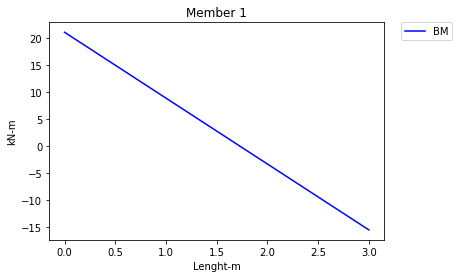

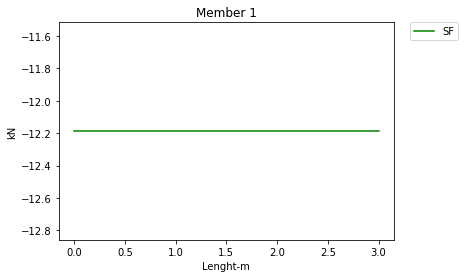

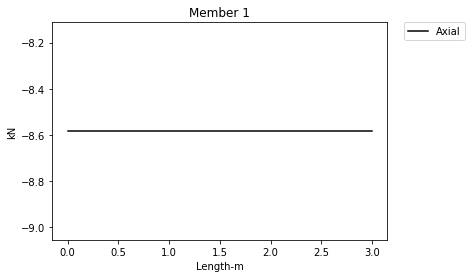

In [105]:
figs(Lenths,member=0)

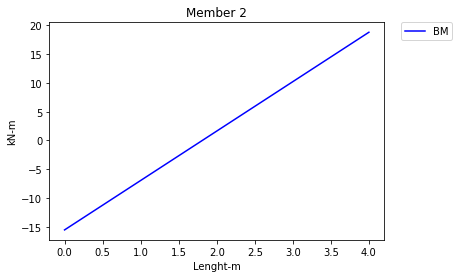

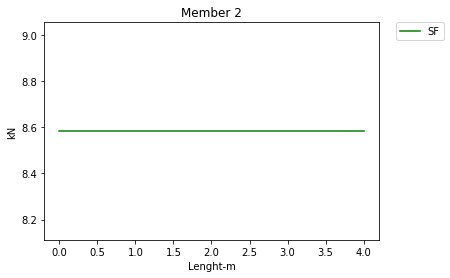

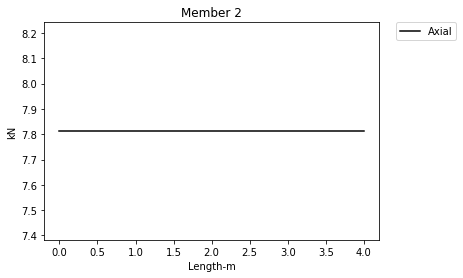

In [101]:
figs(Lenths,member=1)

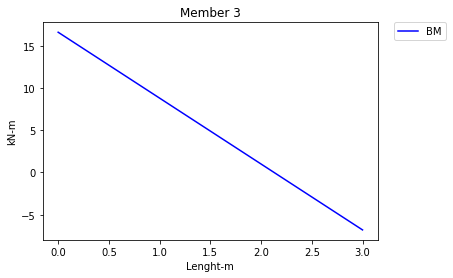

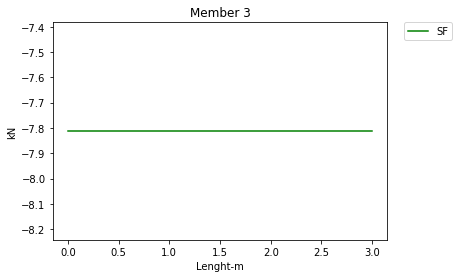

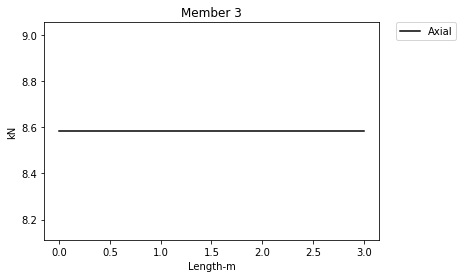

In [103]:
figs(Lenths,member=2)